# 설정부

### --------------------------------------------------------------------

In [ ]:
BATCH_SIZE = 128
IMAGE_SIZE = 32*7 #

# 전처리

In [63]:
import torch
import torch.nn as nn

#import torch.optim as optim

from torch.utils.data import DataLoader,TensorDataset, Dataset
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import numpy as np


In [10]:
# torch version
print(torch.__version__)
# cuda(GPU) 사용 가능 여부
print(torch.cuda.is_available())

1.9.1+cu111
True


# Cuda 사용여부 확인

In [11]:
# GPU 사용 가능하면 cuda, 불가능시 'cpu', torch와 관련된 객체들은 .to(device)를 통해 GPU로 옮겨줌
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(156)

if device == "cuda":
  torch.cuda.manual_seed_all(156)


# cifar10 데이터 download

In [7]:
transform = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize(224),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])
#Resize - > VGG Net에서 대상으로 하는 이미지의 크기가 244x244 이기 때문
#transforms.ToTensor() - 데이터를 tensor(conversion transform)로 바꿔준다.
#입력 데이터가 NumPy 배열 또는 PIL 이미지 형식인 경우 ToTensor를 사용하여 텐서 형식으로 변환
#transforms.Normalize(mean, std, inplace=False) - 정규화한다.(특정 부분이 너무 밝거나 어둡다거나 해서 데이터가 튀는 현상을 막아줌)
#transforms.ToPILImage() - csv 파일로 데이터셋을 받을 경우, PIL image로 바꿔준다.
#transforms.Compose - 여러 단계로 변환해야 하는 경우, Compose를 통해 여러 단계를 묶을 수 있다.

cifar10_train = dsets.CIFAR10(root = "CIFAR100_data/",train=True,transform = transform,download=True)
cifar10_test = dsets.CIFAR10(root="CIFAR100_data/",train=False,transform=transform,download=True)

#    root='./data',         데이터 저장 위치
#    train=True,            True: train set, False: test set
#    download=False,        다운로드 여부, (이미 다운받았으면 False로 지정)
#    transform=transform    데이터 선처리 작업


100.0%


Extracting CIFAR100_data/cifar-10-python.tar.gz to CIFAR100_data/
Files already downloaded and verified


In [34]:
print(type(cifar10_train))
print(type(cifar10_train.data))
print((cifar10_train.data).shape,(cifar10_test.data).shape)

<class 'torchvision.datasets.cifar.CIFAR10'>
<class 'numpy.ndarray'>
(50000, 32, 32, 3) (10000, 32, 32, 3)


test_set 10000개 ,train_set 50000개 32 x 32 ,3 =RGB

6, 9, 9, 4, 1, 

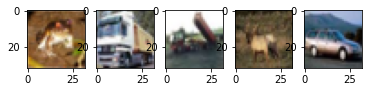

In [38]:
%matplotlib inline
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cifar10_train.data[i])
    print(cifar10_train.targets[i], end=", ")
plt.show()

In [54]:
#mean of number
print(type(cifar10_train.class_to_idx))
cifar10_train.class_to_idx

<class 'dict'>


{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [53]:
cifar10_train.class_to_idx['bird']

2

In [58]:
cifar_label = list(cifar10_train.class_to_idx.keys())

In [61]:
print("The type of cifar_label : ",type(cifar_label))
print(cifar_label)

The type of cifar_label :  <class 'list'>
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Normalization(0~1) & set data

In [64]:
X_train_img = cifar10_train.data / 255.0 #Normalization
y_train_img = np.array(cifar10_train.targets)

X_train = cifar10_train.data
y_train = np.array(cifar10_train.targets)

X_test = cifar10_test.data
y_test = np.array(cifar10_test.targets)

#sklearn.model
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,shuffle=True,random_state=156)

#klearn.model_selection.train_test_split
#(*arrays, test_size=None, train_size=0.25, random_state=None, shuffle=True, stratify=None)

In [81]:
print("Number of train set : ",len(X_train),
      "Number of vaild set :",len(X_valid),"\n\n")
print(X_train_img[0])
print(y_train_img[0])

Number of train set :  40000 Number of vaild set : 10000 


[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 

In [85]:
train_tensor = CustomDataset(X_train,y_train,transform=transform)
valid_tensor = CustomDataset(X_valid,y_valid,transform=transform)
test_tensor = CustomDataset(X_test,y_test,transform=transform)

train_loader = DataLoader(train_tensor,batch_size=BATCH_SIZE,shuffle=True,drop_last=True)
valid_loader = DataLoader(valid_tensor,batch_size=BATCH_SIZE,shuffle=False,drop_last=True)
test_loader = DataLoader(test_tensor,batch_size=BATCH_SIZE,shuffle=False)
#drop_last 데이터가 27개이고 5개씩 배치를 사용하여 2개가 남는걸 버림

312

# 함수 및 Class 정의

pytorch는 객체지향 코딩 권장

In [82]:
#from torch.utils.data import Dataset
#from torch.utils.data import DataLoader

class CustomDataset(Dataset): # Dataset 상속
  def __init__(self,X,y,transform=None):
    self.X = X
    self.y = y
    self.X = torch.FloatTensor(self.X).permute(0,3,1,2)
    self.y = torch.LongTensor(self.y)
    self.transform = transform
  
  # 총 데이터의 개수를 리턴
  def __len__(self):
    return len(self.X)
  

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self,index):

    img = self.X[index]
    label = self.y[index]

    if self.transform is not None:
        img = self.transform(img)

    return (img, label)


### 모델 구현 (VGG NET)

In [103]:
class VGG(nn.Module):
  def __init__(self,num_classes,batch_normalization):
    super().__init__()

    if batch_normalization:

      self.features = nn.Sequential(
          nn.Conv2d(3,64,kernel_size=3,padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(2,2),
          nn.Conv2d(64,128,kernel_size=3,padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(2,2),
          nn.Conv2d(128,256,kernel_size=3,padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(),
          nn.Conv2d(256,256,kernel_size=3,padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(),
          nn.MaxPool2d(2,2),
          nn.Conv2d(256,512,kernel_size=3,padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(),
          nn.Conv2d(512,512,kernel_size=3,padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(),
          nn.Conv2d(512,512,kernel_size=3,padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(),
          nn.Conv2d(512,512,kernel_size=3,padding=1),
          nn.BatchNorm2d(512),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )
    
    else :
      
      self.features = nn.Sequential(
          nn.Conv2d(3,64,kernel_size=3,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2,2),
          nn.Conv2d(64,128,kernel_size=3,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2,2),
          nn.Conv2d(128,256,kernel_size=3,padding=1),
          nn.ReLU(),
          nn.Conv2d(256,256,kernel_size=3,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2,2),
          nn.Conv2d(256,512,kernel_size=3,padding=1),
          nn.ReLU(),
          nn.Conv2d(512,512,kernel_size=3,padding=1),
          nn.ReLU(),
          nn.Conv2d(512,512,kernel_size=3,padding=1),
          nn.ReLU(),
          nn.Conv2d(512,512,kernel_size=3,padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )
    self.avg_pool = nn.AdaptiveAvgPool2d(1)
    
    self.classifier = nn.Sequential(
        nn.Linear(512,1024),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512,10)
    )
  def forward(self,x):
    
    map = self.features(x)
    x = self.avg_pool(map)
    x = x.view(x.size(0),-1)
    x = self.classifier(x)
    return x, map

def init_weights(m):
  if isinstance(m,nn.Conv2d):
    torch.nn.init.kaiming_uniform_(m.weight)
  elif isinstance(m,nn.Linear):
    torch.nn.init.xavier_uniform_(m.weight)

In [105]:
model = VGG(num_classes=10, batch_normalization=False).to(device)
#model.apply(init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=2,T_mult=1,eta_min=0.001,last_epoch=-1)
epochs = 15

In [104]:
train_loss = []
valid_loss = []
train_accuracy = []
valid_accuracy = []

for epoch in range(epochs):
  
  lr_scheduler.step()

  model.train()
  
  train_avg_loss = 0
  valid_avg_loss = 0
  train_correct = 0
  valid_correct = 0

  for X,y in train_loader:
    
    X = X.to(device)
    y = y.to(device)

    outputs,_ = model(X)
    train_correct += torch.sum(outputs.argmax(dim=1) == y).detach().cpu().item()

    loss = criterion(outputs,y)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    train_avg_loss += loss / len(train_loader)
  
  train_accuracy.append(train_correct / len(train_loader.dataset) * 100)
  train_loss.append(train_avg_loss.detach().cpu().item())
  
  model.eval()
  for X,y in valid_loader:
  
    with torch.no_grad():
      X = X.to(device)
      y = y.to(device)

      outputs,_ = model(X)
      valid_correct += torch.sum(outputs.argmax(dim=1) == y).detach().cpu().item()

      loss = criterion(outputs,y)
      valid_avg_loss += loss / len(valid_loader)

  valid_accuracy.append(valid_correct / len(valid_loader.dataset) * 100)
  valid_loss.append(valid_avg_loss.detach().cpu().item())

  torch.save({
      "epoch" : epoch + 1,
      "optimizer_state_dict":optimizer.state_dict(),
      "model_state_dict":model.state_dict(),
      "train_loss":train_avg_loss,
      "valid_loss":valid_avg_loss,
      "description" : f"체크포인트 {epoch + 1}"
  },f"/content/drive/MyDrive/model_batchnormalization_checkpoint_{epoch + 1}.pt")

  print("epoch : {}일때 train loss : {:.3f} train accuracy : {:.2f}% valid loss : {:.3f} valid accuracy : {:.2f}%".format(epoch+1,train_avg_loss,train_correct / len(train_loader.dataset) * 100, valid_avg_loss, valid_correct / len(valid_loader.dataset) * 100))





NameError: name 'epochs' is not defined